d:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.4344 - loss: 1.6794 - val_accuracy: 0.7743 - val_loss: 0.5724
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.7772 - loss: 0.5698 - val_accuracy: 0.8580 - val_loss: 0.4211
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8683 - loss: 0.3772 - val_accuracy: 0.8683 - val_loss: 0.3431
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.8989 - loss: 0.2871 - val_accuracy: 0.8717 - val_loss: 0.3359
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9244 - loss: 0.2149 - val_accuracy: 0.8763 - val_loss: 0.3117
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.9429 - loss: 0.1658 - val_accuracy: 0.9084 - val_loss: 0.2224
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9538 - loss: 0.1262 - val_accuracy: 0.9244 - val_loss: 0.1968
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9743 - loss: 0.0827

✅ Model saved to /model/plant_disease_model.h5


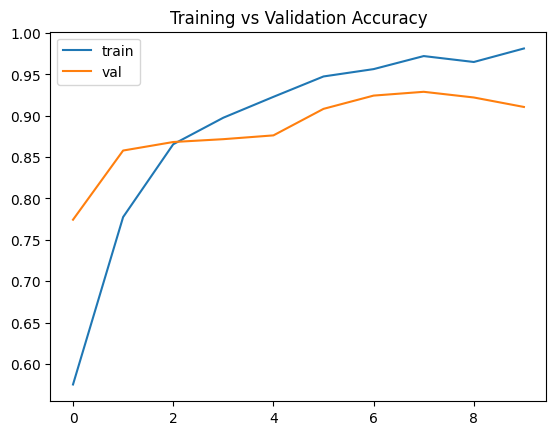

In [2]:
import os
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Set dataset path
dataset_path = os.path.abspath("../dataset")

# Same 4 classes
classes = [
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___healthy"
]

# Load and preprocess images
img_size = 128
data = []
labels = []

for class_name in classes:
    folder_path = os.path.join(dataset_path, class_name)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            data.append(img)
            labels.append(class_name)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# One-hot encode labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Save label classes again (optional)
with open("../model/label_classes.pkl", "wb") as f:
    pickle.dump(lb.classes_, f)

             #####  PART 2  #######

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load data from Step 2 (if not running in same session)
from sklearn.model_selection import train_test_split

# Load data
with open("../model/label_classes.pkl", "rb") as f:
    class_names = pickle.load(f)

# If needed, load preprocessed arrays from Step 2
# (Optional if already in memory)
# X = np.load("../model/X.npy")
# y = np.load("../model/y.npy")

# If in same session, use directly:
# X_train, X_test, y_train, y_test already exist

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop])

# Save model
model.save("../model/plant_disease_model.h5")
print("✅ Model saved to /model/plant_disease_model.h5")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()
